<br><br><center><h1 style="font-size:3em;color:#2467C0">Classification Basic</h1></center>
<br>
<table>
<col width="450">
<tr>
<td><img src="classification_cat_dog.jpeg" align="middle" style="width:350px;height:200px;"/></td>
<td>
다양한 분류 모델 구축에 대해서 실습해본다.
</td>
</tr>
</table>

In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [40]:
from matplotlib.colors import ListedColormap

# 그림 그리는 함수 (참고용으로 활용하자)
def plot_decision_regions(X, y, classifier, title, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.title(title)

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [ ]:
#style.use('seaborn-talk')

## Machine learning starts from here

### Data preparation

In [45]:
iris = datasets.load_iris()

In [46]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [47]:
iris.data.shape

(150, 4)

In [48]:
iris.target.shape

(150,)

In [49]:
X = iris.data[:, [2,3]]
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [50]:
y = iris.target

In [51]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 2) (30, 2) (120,) (30,)


In [54]:
sc = StandardScaler()
sc.fit(X_train) # get mean and sd of X_train

StandardScaler()

In [55]:
X_train_std = sc.fit_transform(X_train)

In [56]:
X_train_std = sc.transform(X_train) # training 데이터 표준화
X_test_std = sc.transform(X_test) # test 데이터 표준화

### Logistic Regression 

In [57]:
lr = LogisticRegression(C=100)
lr

LogisticRegression(C=100)

In [58]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=100)

In [59]:
# X 테스트 데이터의 예측값 구하기
y_pred = lr.predict(X_test_std)

In [60]:
print(y_pred)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [61]:
# 정답값과 예측값의 비교
accuracy_score(y_test, y_pred)

1.0

In [62]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))

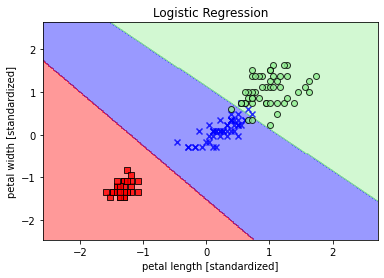

In [63]:
# 그림으로 표현
plot_decision_regions(X=X_combined_std, y=y_combined_std, classifier=lr, title='Logistic Regression')

### Support Vector Machine

In [64]:
from sklearn.svm import SVC

In [65]:
svm = SVC(kernel='linear', C=10, random_state=0)

In [66]:
svm.fit(X_train_std, y_train)

SVC(C=10, kernel='linear', random_state=0)

In [67]:
# X 테스트 데이터의 예측값 구하기
y_pred = svm.predict(X_test_std)

In [68]:
# 정답값과 예측값의 비교
accuracy_score(y_test, y_pred)

0.9666666666666667

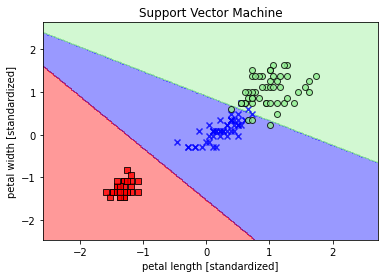

In [69]:
# 그림으로 표현
plot_decision_regions(X=X_combined_std, y=y_combined_std, classifier=svm, title='Support Vector Machine')

### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [73]:
dt.fit(X_train_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [74]:
# X 테스트 데이터의 예측값 구하기
y_pred = dt.predict(X_test_std)

# 정답값과 예측값의 비교
accuracy_score(y_test, y_pred)

0.9666666666666667

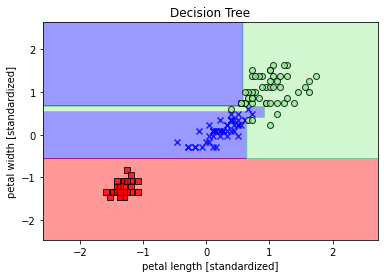

In [75]:
# 그림으로 표현
plot_decision_regions(X=X_combined_std, y=y_combined_std, classifier=dt, title='Decision Tree')

### kNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

In [78]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [79]:
# X 테스트 데이터의 예측값 구하기
y_pred = knn.predict(X_test_std)

# 정답값과 예측값의 비교
accuracy_score(y_test, y_pred)

1.0

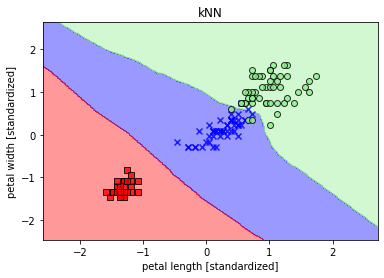

In [80]:
# 그림으로 표현
plot_decision_regions(X=X_combined_std, y=y_combined_std, classifier=knn, title='kNN')